In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, stats
plt.rcParams['figure.figsize'] = [24, 6]
plt.rcParams.update({'font.size': 10})


In [2]:
def get_fft(time, inp):
    dt = (time[1]-time[0])
    n = int(1/dt)
    print(n)
    fhat = abs(np.fft.fft(inp,n))/n
    freq = (1/(dt*n))* np.arange(n)
    L = np.arange(1, np.floor(n/2), dtype='int')

    plt.plot(freq[L], fhat[L], color='c', LineWidth=2)
#     plt.xlim(freq[L[0]], f_lim)
#     plt.legend()

    plt.show()
    return (freq[L], fhat[L])

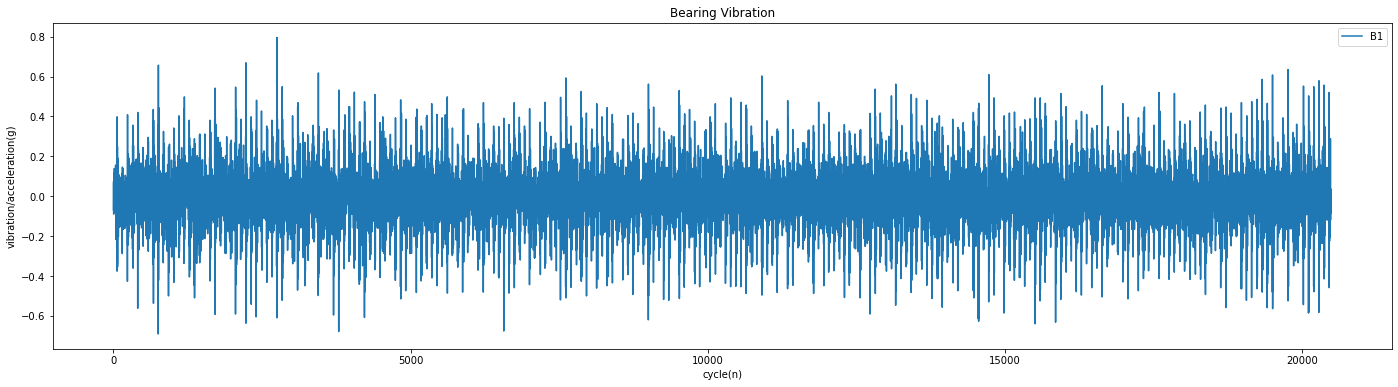

In [3]:
dataset = pd.read_csv('C:/Users/DELL/Documents/All projects/FYP/2nd_test/2004.02.17.16.02.39', sep='\t')
dataset.columns = ['B1','B2','B3','B4']
# dataset.columns = ['B1x', 'B1y', 'B2x', 'B2y', 'B3x', 'B3y', 'B4x', 'B4y', ]
ax = dataset.iloc[:,0:1].plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [5]:
x = dataset['B1'].to_numpy()
x = np.append(x, 0)
len(x)


t = np.arange(0,1.024, 1/20000)
len(t)

20480

3.559191093662786


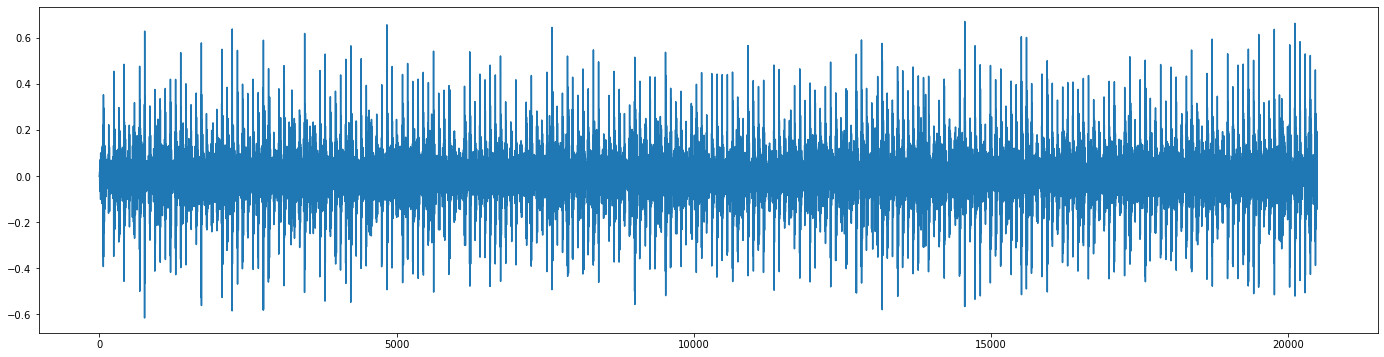

In [6]:
sos = signal.butter(5, [2000 ,6000], 'bandpass', fs=20000, output='sos')

filtered = signal.sosfilt(sos, x)
print(stats.kurtosis(filtered))
plt.plot(filtered)

20000


<ipython-input-2-f653f6bb7a00>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], fhat[L], color='c', LineWidth=2)


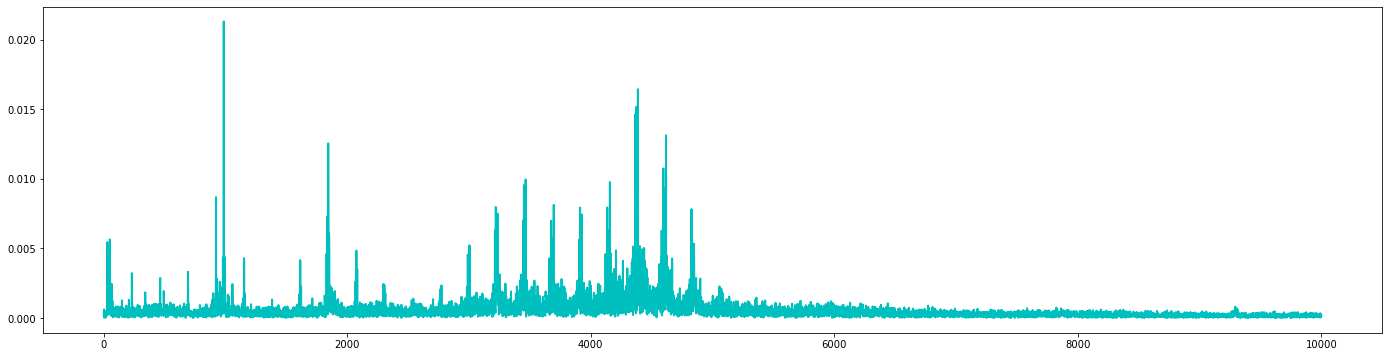

(array([1.000e+00, 2.000e+00, 3.000e+00, ..., 9.997e+03, 9.998e+03,
        9.999e+03]),
 array([3.40505095e-04, 8.80216017e-05, 6.16460997e-04, ...,
        7.34114993e-05, 2.41139040e-04, 1.92406837e-04]))

In [7]:
get_fft(t,x)

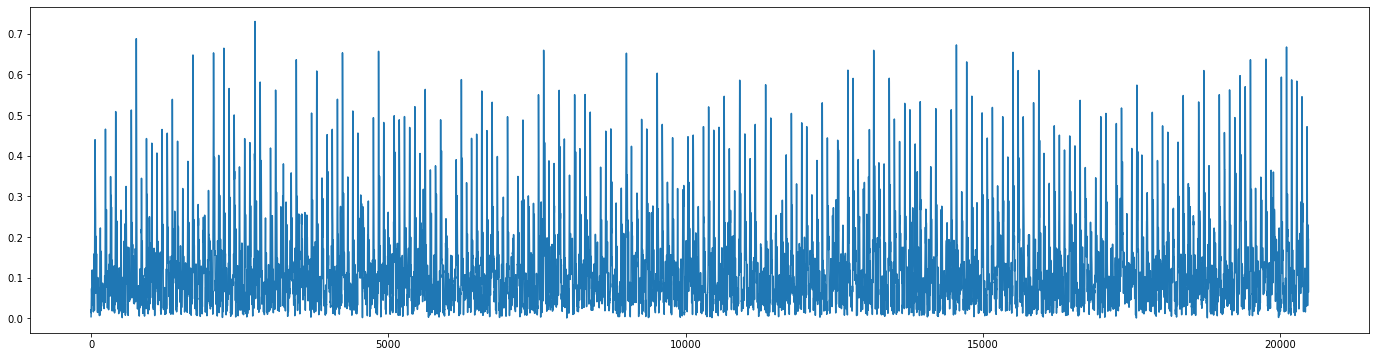

In [8]:
from scipy.fft import fft, fftfreq

y = signal.hilbert(filtered)

# y = signal.hilbert(x)
env = ((y.real)**2 + (y.imag)**2)**0.5
plt.plot(env)


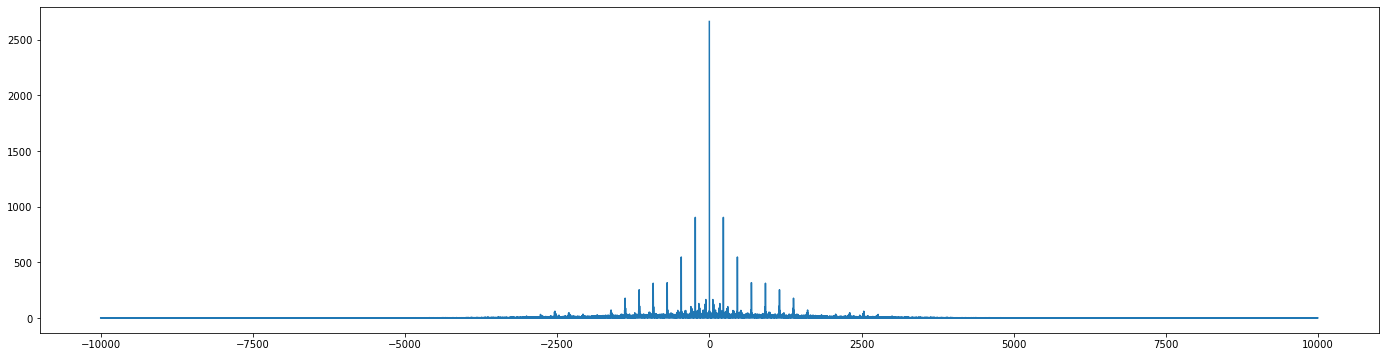

In [9]:
N = 20480
SAMPLE_RATE = 20000

yf = fft(env)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [10]:
out = xf[np.where(abs(yf)>120)]
out

array([    0.       ,    57.6171875,    72.265625 ,   172.8515625,
         230.46875  ,   460.9375   ,   691.40625  ,   921.875    ,
         922.8515625,  1152.34375  ,  1153.3203125,  1382.8125   ,
        1383.7890625, -1383.7890625, -1382.8125   , -1153.3203125,
       -1152.34375  ,  -922.8515625,  -921.875    ,  -691.40625  ,
        -460.9375   ,  -230.46875  ,  -172.8515625,   -72.265625 ,
         -57.6171875])

In [11]:
out = out/33
out

array([  0.        ,   1.74597538,   2.18986742,   5.23792614,
         6.98390152,  13.96780303,  20.95170455,  27.93560606,
        27.96519886,  34.91950758,  34.94910038,  41.90340909,
        41.93300189, -41.93300189, -41.90340909, -34.94910038,
       -34.91950758, -27.96519886, -27.93560606, -20.95170455,
       -13.96780303,  -6.98390152,  -5.23792614,  -2.18986742,
        -1.74597538])

In [12]:
def round(n):
    if abs(n) - abs(int(n)) <0.5:
        return int(n)
    else:
        if n>0: return int(n) + 1
        else: return int(n) - 1

In [13]:
res = []
for i in out:
    if i - round(i) < 0.05 and i - round(i) > -0.05:
        res.append(round(i))
res


[0, 7, 14, 21, 28, -28, -21, -14, -7]

In [14]:
len(res)

9